In [1]:
import sklearn
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
df = pd.read_csv('creditscore.csv')
X, y1 = df.iloc[:,0:-2], df.iloc[:,-2]
#target value the moody's rating
y = df.iloc[:, -1]
print (X.shape)
print (y.shape)

(1700, 26)
(1700,)


In [2]:
#Exploratory data analysis
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['Sales/Revenues', 'Gross Margin', 'EBITDA', 'EBITDA Margin', 'Net Income Before Extras']
sns.pairplot(df[cols], height=1)
plt.tight_layout()
plt.show()

/Users/nerv1996/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


<Figure size 500x500 with 30 Axes>

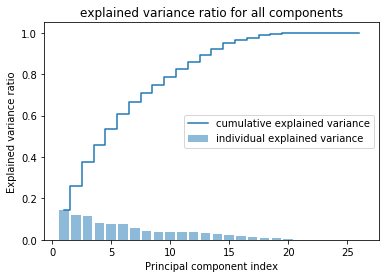

array([0.14248936, 0.26068011, 0.37431631, 0.45612539, 0.53345576,
       0.60825847, 0.66599102, 0.70856058, 0.74718989, 0.78536422,
       0.82284488, 0.8596364 , 0.89407055, 0.92368735, 0.9483856 ,
       0.96549569, 0.97682358, 0.98762043, 0.99548792, 0.99738453,
       0.99870623, 0.99925579, 0.99962062, 0.99988265, 0.99998067,
       1.        ])

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics, svm
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.15,stratify = y,random_state = 42) 
sc = StandardScaler() 

#StandardScaling
X_train_std = sc.fit_transform(X_train) 
X_test_std = sc.transform(X_test)

#Using PCA to select features
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.bar(range(1,27), pca.explained_variance_ratio_, alpha=0.5, align='center',
            label='individual explained variance')
plt.step(range(1,27), cum_var_exp, where='mid',
            label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('explained variance ratio for all components')
plt.legend(loc='best')
plt.show()
cum_var_exp

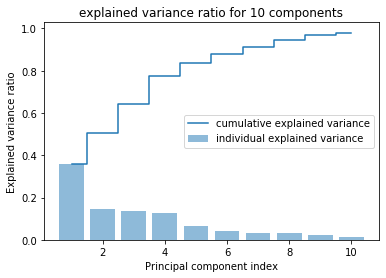

array([0.35937558, 0.50628529, 0.64475338, 0.77378757, 0.83903012,
       0.88093222, 0.91423309, 0.94445437, 0.96790277, 0.9800547 ])

In [4]:
#Feature extraction with PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.bar(range(1,11), pca.explained_variance_ratio_, alpha=0.5, align='center',
            label='individual explained variance')
plt.step(range(1,11), cum_var_exp, where='mid',
            label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('explained variance ratio for 10 components')
plt.legend(loc='best')
plt.show()
cum_var_exp

In [5]:
#Fit with Decision Tree
dt = DecisionTreeClassifier ()
dt.fit(X_train_pca, y_train)
y_pred = dt.predict(X_test_pca)
tree_score = accuracy_score(y_test, y_pred)
print (tree_score)
temp = dt.score(X_train_pca, y_train)
print (temp)
dt.fit(X_train_std, y_train)
y_pred = dt.predict(X_test_std)
temp = accuracy_score(y_test, y_pred)
print (temp)
temp = dt.score(X_train_std, y_train)
print (temp)
#DecisionTree is overfitting, and pca_transformed data performed worse

0.09019607843137255
1.0
0.4235294117647059
1.0


In [6]:
#Fit with Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_pca, y_train)
lr_score = lr.score(X_test_pca, y_test)
lr.fit(X_train_pca, y_train)
print (lr_score)
temp = lr.score(X_train_pca, y_train)
lr.fit(X_train_std, y_train)
print(temp)
temp = lr.score(X_test_std, y_test)
lr.fit(X_train_std, y_train)
print(temp)
temp = lr.score(X_train_std, y_train)
print (temp)
#Results also not so good

/Users/nerv1996/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nerv1996/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/nerv1996/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nerv1996/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/nerv1996/anaconda3/lib/python3.7/site-packages/sklearn/

0.1568627450980392
0.21522491349480968
0.23137254901960785
0.23737024221453287


/Users/nerv1996/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nerv1996/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [7]:
#fit the data with KNearestNeighborClassier
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)
knn_score = knn.score(X_test_pca, y_test)
print (knn_score)
temp = knn.score(X_train_pca, y_train)
knn.fit(X_train_std, y_train)
print(temp)
temp = knn.score(X_test_std, y_test)
knn.fit(X_train_std, y_train)
temp = knn.score(X_train_std, y_train)
print (temp)
#Performance also not good

0.12156862745098039
0.5252595155709343
0.5813148788927336


In [8]:
print ('DecisionTree Score:','%.3f'%tree_score)
print ('LogisticRegression Score:','%.3f'%lr_score)
print ('KNeighbors Score:', '%.3f'%knn_score)

DecisionTree Score: 0.090
LogisticRegression Score: 0.157
KNeighbors Score: 0.122


In [9]:
#Tuning the hyperparameter for tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
params_dt = {'max_depth':range(1,30), 'min_samples_leaf':np.linspace(0.1,0.5,20)}
# Instantiate grid_dt
dt = DecisionTreeClassifier() 
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       cv=5,
                       n_jobs=-1)
grid_dt.fit(X_train_pca, y_train)
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred = best_model.predict(X_test_pca)

# Compute test_roc_auc
tuned_score = accuracy_score(y_test, y_pred)
print (tuned_score)
print (best_model)

/Users/nerv1996/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.17254901960784313
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


/Users/nerv1996/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE
rf = RandomForestClassifier()
params_rf = {'n_estimators': range(20,600,50), #'max_features':['log2','auto','sqrt'], #'min_samples_leaf': [2,10,1],
             'max_depth': range(3,60,5) }
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       cv=5,
                       n_jobs=-1)
grid_rf.fit(X_train_pca, y_train)
# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
rf_score = best_model.score(X_test_pca, y_test)
print(rf_score)

/Users/nerv1996/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/nerv1996/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.17254901960784313


In [16]:
rf = RandomForestClassifier()
rf.fit(X_train_std, y_train)
print(rf.score(X_test_std, y_test))

0.615686274509804


/Users/nerv1996/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [17]:
rf = RandomForestClassifier()
params_rf = {'n_estimators': range(20,300,50), #'max_features':['log2','auto','sqrt'], #'min_samples_leaf': [2,10,1],
             'max_depth': range(3,40,5) }
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       cv=5,)
grid_rf.fit(X_train_std, y_train)
# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
rf_score = best_model.score(X_test_std, y_test)
print(rf_score)

/Users/nerv1996/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/nerv1996/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.6745098039215687


In [23]:
print (best_model)
rf_train_score = best_model.score(X_train_std, y_train)
print ('Mean cross-validated score of the best_estimator', '%.3f'%grid_rf.best_score_)
print ("The score on test data is:", '%.3f'%rf_score)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=23, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=270,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Mean cross-validated score of the best_estimator 0.634
The score on test data is: 0.675


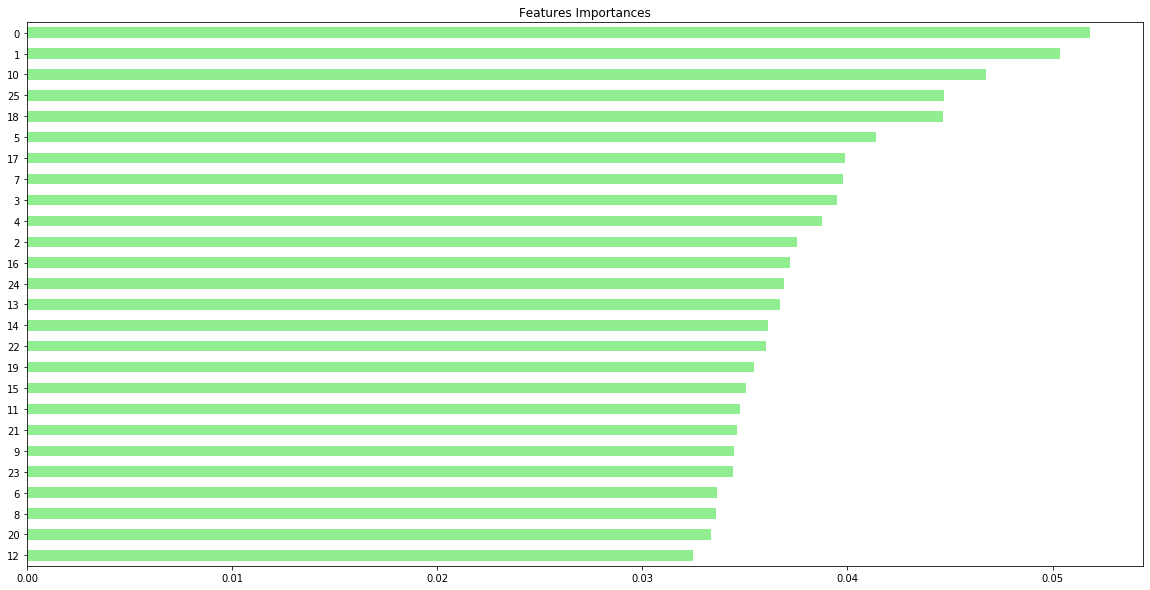

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
X_pd = pd.DataFrame(X_train_std)
importances = pd.Series(data=best_model.feature_importances_,
                        index= X_pd.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(20,10))
importances_sorted.plot(kind='barh', color='lightgreen')

plt.title('Features Importances')
plt.show()